### Task 1 - Data Collection



### A - NCDC Website scraping
Website - https://covid19.ncdc.gov.ng/

In [1]:
# Import all libraries in this cell
import requests
import numpy as np
import urllib.request
import pandas as pd
import csv
import geopandas as gpd
from bs4 import BeautifulSoup
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:

URL = "https://covid19.ncdc.gov.ng/"

#Get data from NCDC website
r = requests.get(URL)
soup = BeautifulSoup(r.content,'html.parser')

In [3]:
#print(soup.prettify())

In [4]:
# Selecting the table with the relevant data
table= soup.find('table', id='custom1')
#table

In [5]:
#Select the headers from the table
# headers = []
# for i in table.find_all('th'):
#     #print(i)
#     title = i.text.strip()
#     headers.append(title)
headers = [i.text.strip() for i in table.find_all('th') ]

In [6]:
headers

['States Affected',
 'No. of Cases (Lab Confirmed)',
 'No. of Cases (on admission)',
 'No. Discharged',
 'No. of Deaths']

In [7]:
def clean(j):
    row_data = j.find_all('td')
    row = [i.text.strip() for i in row_data]
    return row

scraped_data = [ clean(i) for i in table.find_all('tr')]

# scraped_data=[]
# for j in table.find_all('tr'): 
#     row_data = j.find_all('td')
#     row = [i.text.strip() for i in row_data]
#     #print(row)
#     scraped_data.append(row)

In [8]:
len(scraped_data)

38

In [9]:
scraped_data

[[],
 ['Lagos', '104,014', '871', '102,372', '771'],
 ['FCT', '29,464', '143', '29,072', '249'],
 ['Rivers', '18,044', '89', '17,800', '155'],
 ['Kaduna', '11,576', '11', '11,476', '89'],
 ['Oyo', '10,332', '3', '10,127', '202'],
 ['Plateau', '10,330', '3', '10,252', '75'],
 ['Edo', '7,923', '0', '7,601', '322'],
 ['Ogun', '5,810', '11', '5,717', '82'],
 ['Delta', '5,784', '502', '5,170', '112'],
 ['Kano', '5,339', '144', '5,068', '127'],
 ['Ondo', '5,173', '315', '4,749', '109'],
 ['Akwa Ibom', '5,004', '7', '4,953', '44'],
 ['Kwara', '4,691', '452', '4,175', '64'],
 ['Gombe', '3,313', '8', '3,239', '66'],
 ['Osun', '3,311', '29', '3,190', '92'],
 ['Enugu', '2,952', '13', '2,910', '29'],
 ['Anambra', '2,825', '46', '2,760', '19'],
 ['Nasarawa', '2,779', '395', '2,345', '39'],
 ['Imo', '2,678', '30', '2,590', '58'],
 ['Ekiti', '2,464', '6', '2,430', '28'],
 ['Katsina', '2,418', '0', '2,381', '37'],
 ['Benue', '2,317', '88', '2,204', '25'],
 ['Abia', '2,261', '-1', '2,228', '34'],
 ['Eb

In [10]:
#Removing unwanted bracket from scraped data
scraped_data.remove([])

In [11]:
len(scraped_data)

37

In [12]:
scraped_data

[['Lagos', '104,014', '871', '102,372', '771'],
 ['FCT', '29,464', '143', '29,072', '249'],
 ['Rivers', '18,044', '89', '17,800', '155'],
 ['Kaduna', '11,576', '11', '11,476', '89'],
 ['Oyo', '10,332', '3', '10,127', '202'],
 ['Plateau', '10,330', '3', '10,252', '75'],
 ['Edo', '7,923', '0', '7,601', '322'],
 ['Ogun', '5,810', '11', '5,717', '82'],
 ['Delta', '5,784', '502', '5,170', '112'],
 ['Kano', '5,339', '144', '5,068', '127'],
 ['Ondo', '5,173', '315', '4,749', '109'],
 ['Akwa Ibom', '5,004', '7', '4,953', '44'],
 ['Kwara', '4,691', '452', '4,175', '64'],
 ['Gombe', '3,313', '8', '3,239', '66'],
 ['Osun', '3,311', '29', '3,190', '92'],
 ['Enugu', '2,952', '13', '2,910', '29'],
 ['Anambra', '2,825', '46', '2,760', '19'],
 ['Nasarawa', '2,779', '395', '2,345', '39'],
 ['Imo', '2,678', '30', '2,590', '58'],
 ['Ekiti', '2,464', '6', '2,430', '28'],
 ['Katsina', '2,418', '0', '2,381', '37'],
 ['Benue', '2,317', '88', '2,204', '25'],
 ['Abia', '2,261', '-1', '2,228', '34'],
 ['Ebonyi'

In [13]:
headers

['States Affected',
 'No. of Cases (Lab Confirmed)',
 'No. of Cases (on admission)',
 'No. Discharged',
 'No. of Deaths']

In [14]:
#Creating a Data Frame For Scraped Data and Renaming Columns.
data = pd.DataFrame(scraped_data, columns=['states',
 'lab_confirmed_cases',
 'cases_on_admission',
 'discharged',
 'deaths'])

In [15]:
data.head()

states lab_confirmed_cases cases_on_admission discharged deaths
0   Lagos             104,014                871    102,372    771
1     FCT              29,464                143     29,072    249
2  Rivers              18,044                 89     17,800    155
3  Kaduna              11,576                 11     11,476     89
4     Oyo              10,332                  3     10,127    202

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   lab_confirmed_cases  37 non-null     object
 2   cases_on_admission   37 non-null     object
 3   discharged           37 non-null     object
 4   deaths               37 non-null     object
dtypes: object(5)
memory usage: 1.6+ KB


### B - John Hopkins Data Repository
Obtain data from the John Hopkins repository.
* Global Daily Confirmed Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)
* Global Daily Recovered Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv)
* Global Daily Death Cases - Click [Here](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv)

In [17]:
confirmed = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
recovered="https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
deaths= "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

In [18]:
urls= [confirmed, recovered, deaths]

In [19]:
#load csv files int dataframes
covid_data= [ pd.read_csv(i) for i in urls]


In [20]:
#unpack dataframes into variables
covid_confirmed, covid_recovered, covid_deaths=covid_data

In [21]:
#increase column width to 1500.
pd.options.display.max_columns=1500

In [22]:
covid_confirmed.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  \
0        0        0        0        0        0        0        5        5   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        1   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
0        5        5        5        5       5       5       5       5       5   
1        0        0        0        0       0       0       0       0       0   
2        1        1        1        1       1       3       5      12      12   
3        0        0        0        0       0       1       1       1       1   
4        0        0        0        0       0       0       0       0       0   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
0       5       8       8       8        8       11       11       11   
1       0       0       0       2       10       12       23       33   
2      17      17      19      20       20       20       24       26   
3       1       1       1       1        1        1        1        1   
4       0       0       0       0        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
0       14       20       25       26       26       26       24       24   
1       38       42       51       55       59       64       70       76   
2       37       48       54       60       74       87       90      139   
3        1        1        2       39       39       53       75       88   
4        0        0        0        0        0        0        1        2   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
0       34       40       42       74       80       91      106      114   
1       89      104      123      146      174      186      197      212   
2      201      230      264      302      367      409      454      511   
3      1

In [23]:
covid_deaths.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
0        0        0        0        0       0       0       0       0       0   
1        0        0        0        0       0       0       0       0       0   
2        0        0        0        0       0       0       0       0       0   
3        0        0        0        0       0       0       0       0       0   
4        0        0        0        0       0       0       0       0       0   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
0       0       0       0       0        0        0        0        0   
1       0       0       0       0        0        1        1        1   
2       0       0       0       0        0        0        1        2   
3       0       0       0       0        0        0        0        0   
4       0       0       0       0        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
0        0        0        0        0        0        0        0        0   
1        1        1        1        1        2        2        2        2   
2        3        4        4        4        7        9       11       15   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
0        0        1        1        1        2        2        2        4   
1        2        4        5        5        6        8       10       10   
2       17       17       19       21       25       26       29       31   
3       

In [24]:
covid_recovered.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
0        0        0        0        0       0       0       0       0       0   
1        0        0        0        0       0       0       0       0       0   
2        0        0        0        0       0       0       0       0       0   
3        0        0        0        0       0       0       0       0       0   
4        0        0        0        0       0       0       0       0       0   

   3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
0       0       0       0       0        0        0        0        0   
1       0       0       0       0        0        0        0        0   
2       0       0       0       0        0        0        8        8   
3       0       0       0       0        0        0        1        0   
4       0       0       0       0        0        0        0        0   

   3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
0        0        0        1        1        1        1        1        1   
1        0        0        0        0        0        0        0        2   
2       12       12       12       12       12       32       32       32   
3        1        1        1        1        1        1        1        1   
4        0        0        0        0        0        0        0        0   

   3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
0        1        1        1        2        2        2        2        2   
1        2        2       10       17       17       31       31       33   
2       65       65       24       65       29       29       31       31   
3       

In [25]:
list_info= [covid_deaths, covid_recovered, covid_confirmed]
for i in list_info:
    i.info()
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1002 entries, Province/State to 10/15/22
dtypes: float64(2), int64(998), object(2)
memory usage: 2.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Columns: 1002 entries, Province/State to 10/15/22
dtypes: float64(2), int64(998), object(2)
memory usage: 2.1+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 1002 entries, Province/State to 10/15/22
dtypes: float64(2), int64(998), object(2)
memory usage: 2.2+ MB



### C - External Data 
* Save the external data to a DataFrame
* External Data includes but not limited to: `covid_external.csv`, `Budget data.csv`, `RealGDP.csv`

In [26]:
covid_external= pd.read_csv('./External_Data/covid_external.csv')

In [27]:
budget_data=pd.read_csv('./External_Data/Budget data.csv')

### Task 2 - View the data
Obtain basic information about the data using the `head()` and `info()` method.

In [28]:
covid_external.head()

states         region  Population  Overall CCVI Index  Age  \
0        FCT  North Central     4865000                 0.3  0.0   
1    Plateau  North Central     4766000                 0.4  0.5   
2      Kwara  North Central     3524000                 0.3  0.4   
3  Nassarawa  North Central     2783000                 0.1  0.3   
4      Niger  North Central     6260000                 0.6  0.0   

   Epidemiological  Fragility  Health System  Population Density  \
0              0.9        0.4            0.6                 0.9   
1              0.4        0.8            0.3                 0.3   
2              0.3        0.2            0.4                 0.2   
3              0.5        0.9            0.0                 0.1   
4              0.6        0.3            0.7                 0.1   

   Socio-Economic   Transport Availability  Acute IHR  
0             0.6                      0.2       0.79  
1             0.5                      0.3       0.93  
2             0.6                      0.7       0.93  
3             0.6                      0.5       0.85  
4             0.8                      0.8       0.84

In [29]:
covid_external.shape

(37, 12)

In [30]:
covid_external.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   region                   37 non-null     object 
 2   Population               37 non-null     int64  
 3   Overall CCVI Index       37 non-null     float64
 4   Age                      37 non-null     float64
 5   Epidemiological          37 non-null     float64
 6   Fragility                37 non-null     float64
 7   Health System            37 non-null     float64
 8   Population Density       37 non-null     float64
 9   Socio-Economic           37 non-null     float64
 10   Transport Availability  37 non-null     float64
 11  Acute IHR                37 non-null     float64
dtypes: float64(9), int64(1), object(2)
memory usage: 3.6+ KB


In [31]:
budget_data.head()

states  Initial_budget (Bn)  Revised_budget (Bn)
0       Abia               136.60               102.70
1    Adamawa               183.30               139.31
2  Akwa-Ibom               597.73               366.00
3    Anambra               137.10               112.80
4     Bauchi               167.20               128.00

### Task 3 - Data Cleaning and Preparation


TODO A - Clean the scraped data

In [32]:
data.columns

Index(['states', 'lab_confirmed_cases', 'cases_on_admission', 'discharged',
       'deaths'],
      dtype='object')

In [33]:
data.head()

states lab_confirmed_cases cases_on_admission discharged deaths
0   Lagos             104,014                871    102,372    771
1     FCT              29,464                143     29,072    249
2  Rivers              18,044                 89     17,800    155
3  Kaduna              11,576                 11     11,476     89
4     Oyo              10,332                  3     10,127    202

In [34]:
#Removing commas from numerical data
data=data.replace(',','', regex=True)

In [35]:
data.head()

states lab_confirmed_cases cases_on_admission discharged deaths
0   Lagos              104014                871     102372    771
1     FCT               29464                143      29072    249
2  Rivers               18044                 89      17800    155
3  Kaduna               11576                 11      11476     89
4     Oyo               10332                  3      10127    202

In [36]:
#Checking for null values
data.isnull().sum()

states                 0
lab_confirmed_cases    0
cases_on_admission     0
discharged             0
deaths                 0
dtype: int64

In [37]:
#Converting the numerical data to integers
str_to_int= ['lab_confirmed_cases','cases_on_admission', 'discharged', 'deaths' ]
for i in str_to_int:
    data[i]= data[i].astype('int64')
    

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   states               37 non-null     object
 1   lab_confirmed_cases  37 non-null     int64 
 2   cases_on_admission   37 non-null     int64 
 3   discharged           37 non-null     int64 
 4   deaths               37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


### Checking for variation in state names for the two data sets.

In [39]:
np.setdiff1d(data['states'], covid_external['states'])

array(['Cross River', 'Nasarawa'], dtype=object)

In [40]:
np.setdiff1d(covid_external['states'], data['states'])

array(['Cross river', 'Nassarawa'], dtype=object)

In [41]:
covid_external=covid_external.replace('Cross river', 'Cross River') #Replacing values

In [42]:
data=data.replace('Nasarawa','Nassarawa')

### Getting Daily data for Deaths, Confirmed and Recovered Cases in Nigeria

In [43]:
list_data= [covid_deaths, covid_recovered, covid_confirmed]

In [44]:

Daily_Data=[i[i['Country/Region']=='Nigeria'] for i in list_data]
# for i in list1:
#     a=i[i['Country/Region']=='Nigeria']
#     Daily_Data.append(a)

In [45]:
nigeria_timeseries= pd.concat(Daily_Data, axis=0)
nigeria_timeseries

Province/State Country/Region    Lat    Long  1/22/20  1/23/20  1/24/20  \
206            NaN        Nigeria  9.082  8.6753        0        0        0   
191            NaN        Nigeria  9.082  8.6753        0        0        0   
206            NaN        Nigeria  9.082  8.6753        0        0        0   

     1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
206        0        0        0        0        0        0        0       0   
191        0        0        0        0        0        0        0       0   
206        0        0        0        0        0        0        0       0   

     2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  2/10/20  \
206       0       0       0       0       0       0       0       0        0   
191       0       0       0       0       0       0       0       0        0   
206       0       0       0       0       0       0       0       0        0   

     2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  2/17/20  2/18/20  \
206        0        0        0        0        0        0        0        0   
191        0        0        0        0        0        0        0        0   
206        0        0        0        0        0        0        0        0   

     2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  \
206        0        0        0        0        0        0        0        0   
191        0        0        0        0        0        0        0        0   
206        0        0        0        0        0        0        0        0   

     2/27/20  2/28/20  2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  \
206        0        0        0       0       0       0       0       0   
191        0        0        0       0       0       0       0       0   
206        0        1        1       1       1       1       1       1   

     3/6/20  3/7/20  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  \
206       0       0       0       0        0        0        0        0   
191       0       0       0       0        0        0        0        0   
206       1       1       1       2        2        2        2        2   

     3/14/20  3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
206        0        0        0        0        0        0        0        0   
191        0        0        0        0        1        1        1        1   
206        2        2        2        3        8        8       12       22   

     3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  \
206        0        1        1        1        1        1        1        1   
191        2        2        2        2        2        3        3        3   
206       30       40       44       51       65       70       89      111   

     3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  \
206        2        2       2       2       4       4       5       5       6   
191        8        8       9      20      25      25      33      35      44   
206      131      135     174     184     210     214     232     238     254   

     4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  4/15/20  \
206       6       7        7       10       10       10       11       12   
191      44      51       58       70       85       91       99      128   
206     276     288      305      318      323      343      373      407   

     4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  \
206       13       17       19       21       22       22       28       31   
191      152      159      166      170      188      188      197      197   
206      442      493      542      627      665      665      873      981   

     4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  \
206       32       35       40       40       44       51       58      68   
191      208      222      239      255      255      307      319     351   
20

In [46]:
#Renaming index
nigeria_timeseries=nigeria_timeseries.set_index([pd.Index(['deaths', 'recovered', 'confirmed'])])
nigeria_timeseries

Province/State Country/Region    Lat    Long  1/22/20  1/23/20  \
deaths               NaN        Nigeria  9.082  8.6753        0        0   
recovered            NaN        Nigeria  9.082  8.6753        0        0   
confirmed            NaN        Nigeria  9.082  8.6753        0        0   

           1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        0        0        0        0   
confirmed        0        0        0        0        0        0        0   

           1/31/20  2/1/20  2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  \
deaths           0       0       0       0       0       0       0       0   
recovered        0       0       0       0       0       0       0       0   
confirmed        0       0       0       0       0       0       0       0   

           2/8/20  2/9/20  2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  \
deaths          0       0        0        0        0        0        0   
recovered       0       0        0        0        0        0        0   
confirmed       0       0        0        0        0        0        0   

           2/15/20  2/16/20  2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        0        0        0        0   
confirmed        0        0        0        0        0        0        0   

           2/22/20  2/23/20  2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        0        0        0        0   
confirmed        0        0        0        0        0        0        1   

           2/29/20  3/1/20  3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  \
deaths           0       0       0       0       0       0       0       0   
recovered        0       0       0       0       0       0       0       0   
confirmed        1       1       1       1       1       1       1       1   

           3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  \
deaths          0       0        0        0        0        0        0   
recovered       0       0        0        0        0        0        0   
confirmed       1       2        2        2        2        2        2   

           3/15/20  3/16/20  3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        1        1        1        1   
confirmed        2        2        3        8        8       12       22   

           3/22/20  3/23/20  3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  \
deaths           0        1        1        1        1        1        1   
recovered        2        2        2        2        2        3        3   
confirmed       30       40       44       51       65       70       89   

           3/29/20  3/30/20  3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  \
deaths           1        2        2       2       2       4       4       5   
recovered        3        8        8       9      20      25      25      33   
confirmed      111      131      135     174     184     210     214     232   

           4/6/20  4/7/20  4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  \
deaths          5       6       6       7        7       10       10       10   
recovered      35      44      44      51       58       70       85       91   
confirmed     238     254     276     288      305      318      323      343   

           4/14/20  4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  \
deaths          11       12       13       17       19       21       22   
recovered       99      128      152      159      166      170      188   
confirmed      373      407      442      493      542      627      665   

         

In [47]:
#drop Province/State column
if 'Province/State' in nigeria_timeseries.columns:
    nigeria_timeseries.drop('Province/State', axis=1, inplace=True)

In [48]:
nigeria_timeseries

Country/Region    Lat    Long  1/22/20  1/23/20  1/24/20  1/25/20  \
deaths           Nigeria  9.082  8.6753        0        0        0        0   
recovered        Nigeria  9.082  8.6753        0        0        0        0   
confirmed        Nigeria  9.082  8.6753        0        0        0        0   

           1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
deaths           0        0        0        0        0        0       0   
recovered        0        0        0        0        0        0       0   
confirmed        0        0        0        0        0        0       0   

           2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
deaths          0       0       0       0       0       0       0       0   
recovered       0       0       0       0       0       0       0       0   
confirmed       0       0       0       0       0       0       0       0   

           2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        0        0        0        0   
confirmed        0        0        0        0        0        0        0   

           2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        0        0        0        0   
confirmed        0        0        0        0        0        0        0   

           2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  \
deaths           0        0        0        0        0        0       0   
recovered        0        0        0        0        0        0       0   
confirmed        0        0        0        0        1        1       1   

           3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
deaths          0       0       0       0       0       0       0       0   
recovered       0       0       0       0       0       0       0       0   
confirmed       1       1       1       1       1       1       1       2   

           3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        0        0        0        0   
confirmed        2        2        2        2        2        2        2   

           3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  \
deaths           0        0        0        0        0        0        1   
recovered        0        1        1        1        1        2        2   
confirmed        3        8        8       12       22       30       40   

           3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
deaths           1        1        1        1        1        1        2   
recovered        2        2        2        3        3        3        8   
confirmed       44       51       65       70       89      111      131   

           3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  \
deaths           2       2       2       4       4       5       5       6   
recovered        8       9      20      25      25      33      35      44   
confirmed      135     174     184     210     214     232     238     254   

           4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  \
deaths          6       7        7       10       10       10       11   
recovered      44      51       58       70       85       91       99   
confirmed     276     288      305      318      323      343      373   

           4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  \
deaths          12       13       17       19       21       22       22   
recovered      128      152      159      166      170      188      188   
confirmed      407      442      493      542      627      665      665   

           4/22/20  4/23/20  4/24

In [49]:
#Checking for Null Values
nigeria_timeseries.isnull().sum(axis=1)

deaths       0
recovered    0
confirmed    0
dtype: int64

In [50]:
nigeria_timeseries

Country/Region    Lat    Long  1/22/20  1/23/20  1/24/20  1/25/20  \
deaths           Nigeria  9.082  8.6753        0        0        0        0   
recovered        Nigeria  9.082  8.6753        0        0        0        0   
confirmed        Nigeria  9.082  8.6753        0        0        0        0   

           1/26/20  1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  2/1/20  \
deaths           0        0        0        0        0        0       0   
recovered        0        0        0        0        0        0       0   
confirmed        0        0        0        0        0        0       0   

           2/2/20  2/3/20  2/4/20  2/5/20  2/6/20  2/7/20  2/8/20  2/9/20  \
deaths          0       0       0       0       0       0       0       0   
recovered       0       0       0       0       0       0       0       0   
confirmed       0       0       0       0       0       0       0       0   

           2/10/20  2/11/20  2/12/20  2/13/20  2/14/20  2/15/20  2/16/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        0        0        0        0   
confirmed        0        0        0        0        0        0        0   

           2/17/20  2/18/20  2/19/20  2/20/20  2/21/20  2/22/20  2/23/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        0        0        0        0   
confirmed        0        0        0        0        0        0        0   

           2/24/20  2/25/20  2/26/20  2/27/20  2/28/20  2/29/20  3/1/20  \
deaths           0        0        0        0        0        0       0   
recovered        0        0        0        0        0        0       0   
confirmed        0        0        0        0        1        1       1   

           3/2/20  3/3/20  3/4/20  3/5/20  3/6/20  3/7/20  3/8/20  3/9/20  \
deaths          0       0       0       0       0       0       0       0   
recovered       0       0       0       0       0       0       0       0   
confirmed       1       1       1       1       1       1       1       2   

           3/10/20  3/11/20  3/12/20  3/13/20  3/14/20  3/15/20  3/16/20  \
deaths           0        0        0        0        0        0        0   
recovered        0        0        0        0        0        0        0   
confirmed        2        2        2        2        2        2        2   

           3/17/20  3/18/20  3/19/20  3/20/20  3/21/20  3/22/20  3/23/20  \
deaths           0        0        0        0        0        0        1   
recovered        0        1        1        1        1        2        2   
confirmed        3        8        8       12       22       30       40   

           3/24/20  3/25/20  3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  \
deaths           1        1        1        1        1        1        2   
recovered        2        2        2        3        3        3        8   
confirmed       44       51       65       70       89      111      131   

           3/31/20  4/1/20  4/2/20  4/3/20  4/4/20  4/5/20  4/6/20  4/7/20  \
deaths           2       2       2       4       4       5       5       6   
recovered        8       9      20      25      25      33      35      44   
confirmed      135     174     184     210     214     232     238     254   

           4/8/20  4/9/20  4/10/20  4/11/20  4/12/20  4/13/20  4/14/20  \
deaths          6       7        7       10       10       10       11   
recovered      44      51       58       70       85       91       99   
confirmed     276     288      305      318      323      343      373   

           4/15/20  4/16/20  4/17/20  4/18/20  4/19/20  4/20/20  4/21/20  \
deaths          12       13       17       19       21       22       22   
recovered      128      152      159      166      170      188      188   
confirmed      407      442      493      542      627      665      665   

           4/22/20  4/23/20  4/24

In [51]:
nig_timeseries= nigeria_timeseries.T
nig_timeseries.head()

deaths recovered confirmed
Country/Region  Nigeria   Nigeria   Nigeria
Lat               9.082     9.082     9.082
Long             8.6753    8.6753    8.6753
1/22/20               0         0         0
1/23/20               0         0         0

In [52]:
nig_timeseries=nig_timeseries[4:]
nig_timeseries.head()

deaths recovered confirmed
1/23/20      0         0         0
1/24/20      0         0         0
1/25/20      0         0         0
1/26/20      0         0         0
1/27/20      0         0         0

In [53]:
nig=nig_timeseries.index

In [54]:
#create date column if not in the df
if 'dates' not in nig_timeseries.columns:
    nig_timeseries.insert(0, 'dates', nig)

In [55]:

nig_timeseries.head()

dates deaths recovered confirmed
1/23/20  1/23/20      0         0         0
1/24/20  1/24/20      0         0         0
1/25/20  1/25/20      0         0         0
1/26/20  1/26/20      0         0         0
1/27/20  1/27/20      0         0         0

In [56]:
nig_timeseries.columns

Index(['dates', 'deaths', 'recovered', 'confirmed'], dtype='object')

In [57]:
create_list= list(range(0, len(nig_timeseries)))
#create list to use for df index

In [58]:
#set index with created list
nig_timeseries=nig_timeseries.set_index([(create_list)])

In [59]:
nig_timeseries.head()

dates deaths recovered confirmed
0  1/23/20      0         0         0
1  1/24/20      0         0         0
2  1/25/20      0         0         0
3  1/26/20      0         0         0
4  1/27/20      0         0         0

In [60]:
#set date column to datetime data type
nig_timeseries['dates']= pd.to_datetime(nig_timeseries['dates'])

In [61]:
#convert numeric columns to integers
for i in ['deaths','recovered','confirmed']:
    nig_timeseries[i] =nig_timeseries[i].astype('int')

In [62]:
nig_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 996
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dates      997 non-null    datetime64[ns]
 1   deaths     997 non-null    int32         
 2   recovered  997 non-null    int32         
 3   confirmed  997 non-null    int32         
dtypes: datetime64[ns](1), int32(3)
memory usage: 27.3 KB


### Task 4 - Analysis


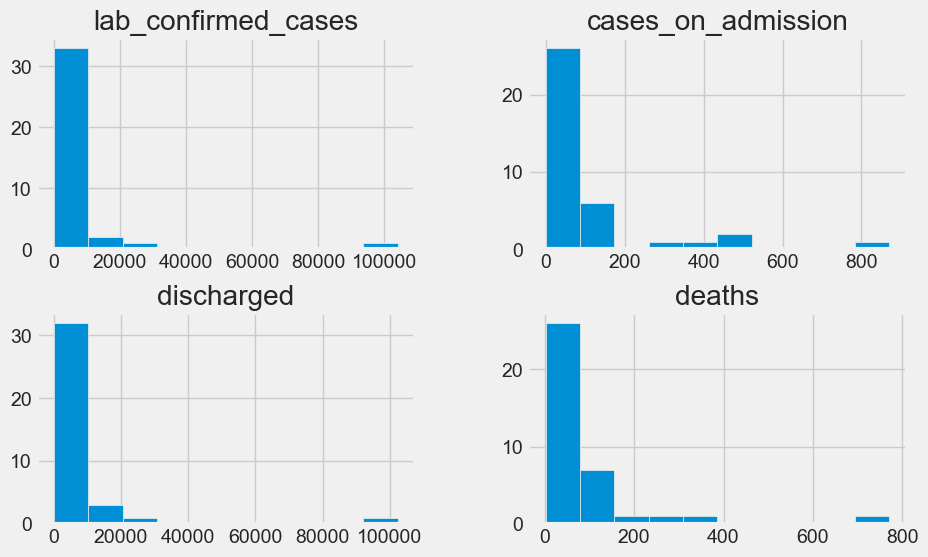

In [63]:
#check the distribution of the data
data.hist(figsize=(10, 6));

TODO A - Generate a plot that shows the Top 10 states in terms of Confirmed Covid cases by Laboratory test

<AxesSubplot: xlabel='states'>

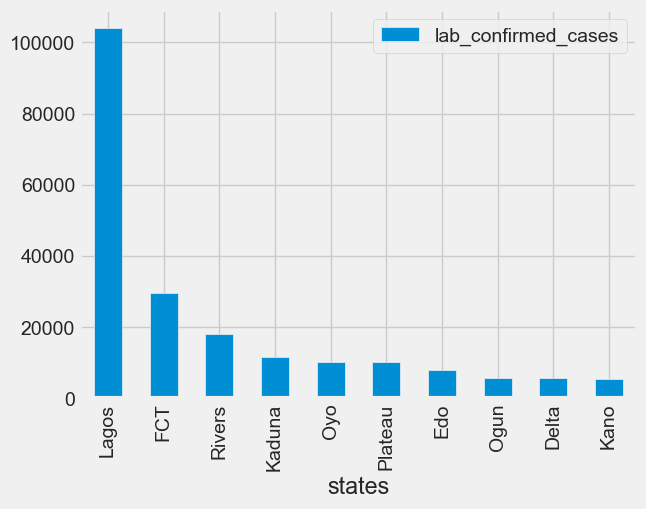

In [64]:
data.nlargest(10, 'lab_confirmed_cases').plot.bar(x='states', y='lab_confirmed_cases')

TODO B - Generate a plot that shows the Top 10 states in terms of Discharged Covid cases. 

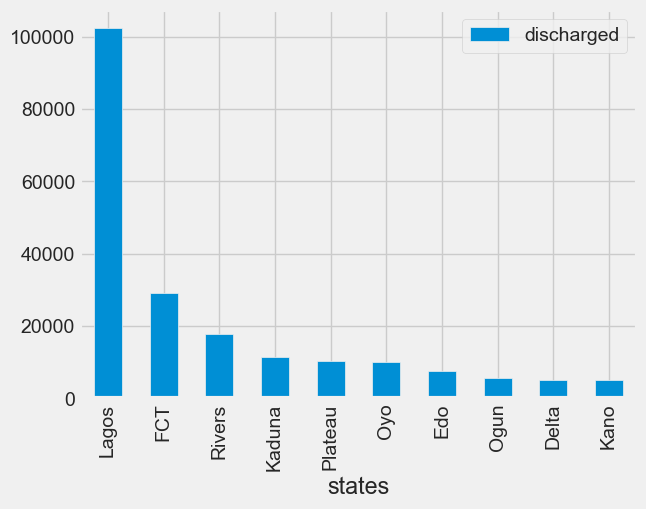

In [65]:
data.nlargest(10, 'discharged').plot.bar(x='states', y='discharged');

TODO D - Plot the top 10 Death cases

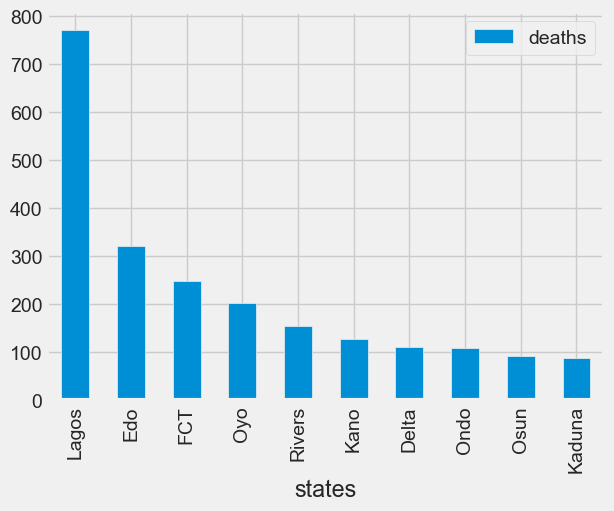

In [66]:
data.nlargest(10, 'deaths').plot.bar(x='states', y='deaths');

TODO E - Generate a line plot for the total daily confirmed, recovered and death cases in Nigeria

In [67]:
pd.options.display.max_rows=1500

In [68]:
nig_timeseries.head(50)

dates  deaths  recovered  confirmed
0  2020-01-23       0          0          0
1  2020-01-24       0          0          0
2  2020-01-25       0          0          0
3  2020-01-26       0          0          0
4  2020-01-27       0          0          0
5  2020-01-28       0          0          0
6  2020-01-29       0          0          0
7  2020-01-30       0          0          0
8  2020-01-31       0          0          0
9  2020-02-01       0          0          0
10 2020-02-02       0          0          0
11 2020-02-03       0          0          0
12 2020-02-04       0          0          0
13 2020-02-05       0          0          0
14 2020-02-06       0          0          0
15 2020-02-07       0          0          0
16 2020-02-08       0          0          0
17 2020-02-09       0          0          0
18 2020-02-10       0          0          0
19 2020-02-11       0          0          0
20 2020-02-12       0          0          0
21 2020-02-13       0          0          0
22 2020-02-14       0          0          0
23 2020-02-15       0          0          0
24 2020-02-16       0          0          0
25 2020-02-17       0          0          0
26 2020-02-18       0          0          0
27 2020-02-19       0          0          0
28 2020-02-20       0          0          0
29 2020-02-21       0          0          0
30 2020-02-22       0          0          0
31 2020-02-23       0          0          0
32 2020-02-24       0          0          0
33 2020-02-25       0          0          0
34 2020-02-26       0          0          0
35 2020-02-27       0          0          0
36 2020-02-28       0          0          1
37 2020-02-29       0          0          1
38 2020-03-01       0          0          1
39 2020-03-02       0          0          1
40 2020-03-03       0          0          1
41 2020-03-04       0          0          1
42 2020-03-05       0          0          1
43 2020-03-06       0          0          1
44 2020-03-07       0          0          1
45 2020-03-08       0          0          1
46 2020-03-09       0          0          2
47 2020-03-10       0          0          2
48 2020-03-11       0          0          2
49 2020-03-12       0          0          2

In [69]:
#Get the actual covid data for each day
column_names =['deaths','recovered','confirmed']
new_column_names=['daily_death_count', 'daily_recovered_count', 'daily_confirmed_count']
def difference(a,b):
    nig_timeseries[b] = nig_timeseries[a].diff()
for i in range(len(column_names)):
    difference(column_names[i], new_column_names[i])

In [70]:
nig_timeseries.head(70)

dates  deaths  recovered  confirmed  daily_death_count  \
0  2020-01-23       0          0          0                NaN   
1  2020-01-24       0          0          0                0.0   
2  2020-01-25       0          0          0                0.0   
3  2020-01-26       0          0          0                0.0   
4  2020-01-27       0          0          0                0.0   
5  2020-01-28       0          0          0                0.0   
6  2020-01-29       0          0          0                0.0   
7  2020-01-30       0          0          0                0.0   
8  2020-01-31       0          0          0                0.0   
9  2020-02-01       0          0          0                0.0   
10 2020-02-02       0          0          0                0.0   
11 2020-02-03       0          0          0                0.0   
12 2020-02-04       0          0          0                0.0   
13 2020-02-05       0          0          0                0.0   
14 2020-02-06       0          0          0                0.0   
15 2020-02-07       0          0          0                0.0   
16 2020-02-08       0          0          0                0.0   
17 2020-02-09       0          0          0                0.0   
18 2020-02-10       0          0          0                0.0   
19 2020-02-11       0          0          0                0.0   
20 2020-02-12       0          0          0                0.0   
21 2020-02-13       0          0          0                0.0   
22 2020-02-14       0          0          0                0.0   
23 2020-02-15       0          0          0                0.0   
24 2020-02-16       0          0          0                0.0   
25 2020-02-17       0          0          0                0.0   
26 2020-02-18       0          0          0                0.0   
27 2020-02-19       0          0          0                0.0   
28 2020-02-20       0          0          0                0.0   
29 2020-02-21       0          0          0                0.0   
30 2020-02-22       0          0          0                0.0   
31 2020-02-23       0          0          0                0.0   
32 2020-02-24       0          0          0                0.0   
33 2020-02-25       0          0          0                0.0   
34 2020-02-26       0          0          0                0.0   
35 2020-02-27       0          0          0                0.0   
36 2020-02-28       0          0          1                0.0   
37 2020-02-29       0          0          1                0.0   
38 2020-03-01       0          0          1                0.0   
39 2020-03-02       0          0          1                0.0   
40 2020-03-03       0          0          1                0.0   
41 2020-03-04       0          0          1                0.0   
42 2020-03-05       0          0          1                0.0   
43 2020-03-06       0          0          1                0.0   
44 2020-03-07       0          0          1                0.0   
45 2020-03-08       0          0          1                0.0   
46 2020-03-09       0          0          2                0.0   
47 2020-03-10       0          0          2                0.0   
48 2020-03-11       0          0          2                0.0   
49 2020-03-12       0          0          2                0.0   
50 2020-03-13       0          0          2                0.0   
51 2020-03-14       0          0          2                0.0   
52 2020-03-15       0          0          2                0.0   
53 2020-03-16       0          0          2                0.0   
54 2020-03-17       0          0          3                0.0   
55 2020-03-18       0          1          8                0.0   
56 2020-03-19       0          1          8                0.0   
57 2020-03-20       0          1         12                0.0   
58 2020-03-21       0          1         22                0.0   
59 2020-03-22       0          2         30     

In [71]:
nig_timeseries.shape

(997, 7)

In [72]:
nig_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 996
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   dates                  997 non-null    datetime64[ns]
 1   deaths                 997 non-null    int32         
 2   recovered              997 non-null    int32         
 3   confirmed              997 non-null    int32         
 4   daily_death_count      996 non-null    float64       
 5   daily_recovered_count  996 non-null    float64       
 6   daily_confirmed_count  996 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(3)
memory usage: 50.6 KB


In [73]:
#nig_timeseries

In [74]:
#Check for erroneous values as a result of incorrect data input and set them to zero.
nig_timeseries.query('daily_confirmed_count < 0')

dates  deaths  recovered  confirmed  daily_death_count  \
811 2022-04-13    3142          0     255633                0.0   

     daily_recovered_count  daily_confirmed_count  
811                    0.0                  -30.0

In [75]:
nig_timeseries.iloc[805:812]
#we can clearly see the error in row 811

dates  deaths  recovered  confirmed  daily_death_count  \
805 2022-04-07    3142          0     255575                0.0   
806 2022-04-08    3142          0     255575                0.0   
807 2022-04-09    3142          0     255606                0.0   
808 2022-04-10    3142          0     255606                0.0   
809 2022-04-11    3142          0     255633                0.0   
810 2022-04-12    3142          0     255663                0.0   
811 2022-04-13    3142          0     255633                0.0   

     daily_recovered_count  daily_confirmed_count  
805                    0.0                   59.0  
806                    0.0                    0.0  
807                    0.0                   31.0  
808                    0.0                    0.0  
809                    0.0                   27.0  
810                    0.0                   30.0  
811                    0.0                  -30.0

In [76]:
#set the value at the position to 0.
nig_timeseries.daily_confirmed_count.iloc[811]=0

In [77]:
nig_timeseries.query('daily_death_count < 0')

dates  deaths  recovered  confirmed  daily_death_count  \
290 2020-11-08    1154      59910      64090               -1.0   
869 2022-06-10    3144          0     256264               -4.0   

     daily_recovered_count  daily_confirmed_count  
290                   26.0                  300.0  
869                    0.0                    0.0

In [78]:
nig_timeseries.iloc[865:870]

dates  deaths  recovered  confirmed  daily_death_count  \
865 2022-06-06    3148          0     256148                5.0   
866 2022-06-07    3148          0     256227                0.0   
867 2022-06-08    3148          0     256227                0.0   
868 2022-06-09    3148          0     256264                0.0   
869 2022-06-10    3144          0     256264               -4.0   

     daily_recovered_count  daily_confirmed_count  
865                    0.0                    0.0  
866                    0.0                   79.0  
867                    0.0                    0.0  
868                    0.0                   37.0  
869                    0.0                    0.0

In [79]:
nig_timeseries.daily_death_count.iloc[869]=0

In [80]:
nig_timeseries.iloc[289:295]

dates  deaths  recovered  confirmed  daily_death_count  \
289 2020-11-07    1155      59884      63790                0.0   
290 2020-11-08    1154      59910      64090               -1.0   
291 2020-11-09    1158      60069      64184                4.0   
292 2020-11-10    1160      60333      64336                2.0   
293 2020-11-11    1162      60737      64516                2.0   
294 2020-11-12    1162      60790      64728                0.0   

     daily_recovered_count  daily_confirmed_count  
289                   40.0                   59.0  
290                   26.0                  300.0  
291                  159.0                   94.0  
292                  264.0                  152.0  
293                  404.0                  180.0  
294                   53.0                  212.0

In [81]:
nig_timeseries.daily_death_count.iloc[290]=0

In [82]:
nig_timeseries.query('daily_recovered_count < 0')

dates  deaths  recovered  confirmed  daily_death_count  \
560 2021-08-05    2178          0     176577               11.0   

     daily_recovered_count  daily_confirmed_count  
560              -165208.0                  566.0

In [83]:
nig_timeseries.daily_recovered_count.iloc[560]=0

#### Create 7 day Moving Average for Confirmed, recovered and Death cases to properly visualize the data.

In [84]:

column_name =['deaths_moving_average','recovered_moving_average','confirmed_moving_average']
new_column_names=['daily_death_count', 'daily_recovered_count', 'daily_confirmed_count']
def moving_avg(a,b):
    nig_timeseries[a] = nig_timeseries[b].rolling(window=7).mean()
for i in range(len(column_name)):
    moving_avg(column_name[i], new_column_names[i])

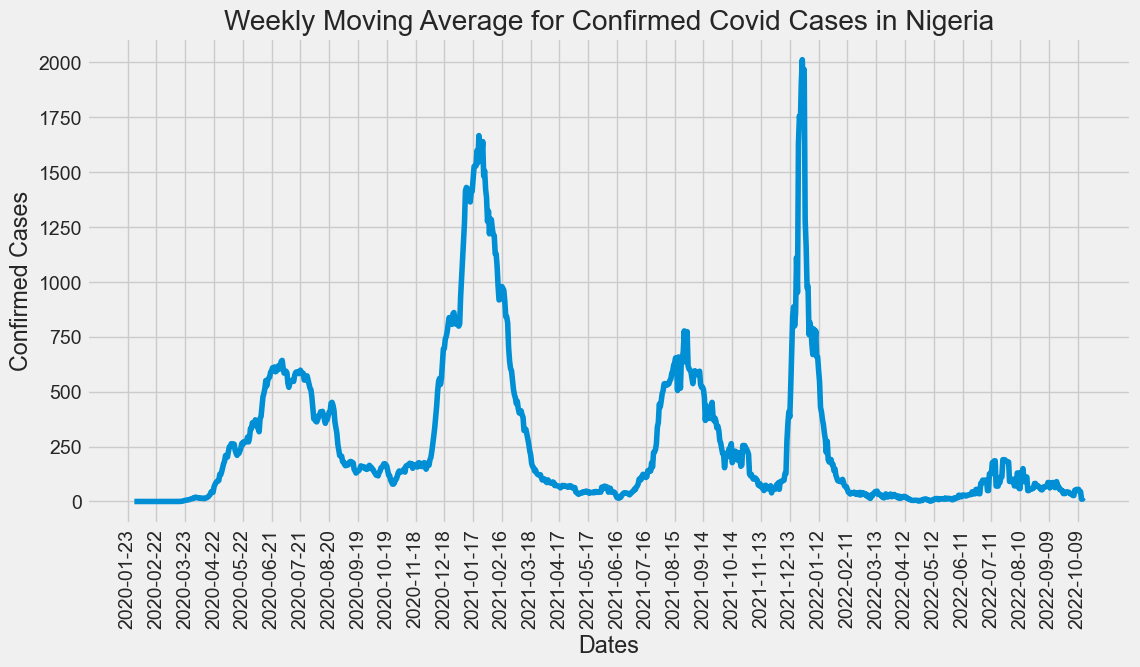

In [85]:
plt.figure(figsize=(12, 6))
plt.title('Weekly Moving Average for Confirmed Covid Cases in Nigeria')
sns.lineplot(x='dates', y='confirmed_moving_average', data=nig_timeseries)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.xticks(nig_timeseries.dates[::30], rotation='vertical')
plt.show()

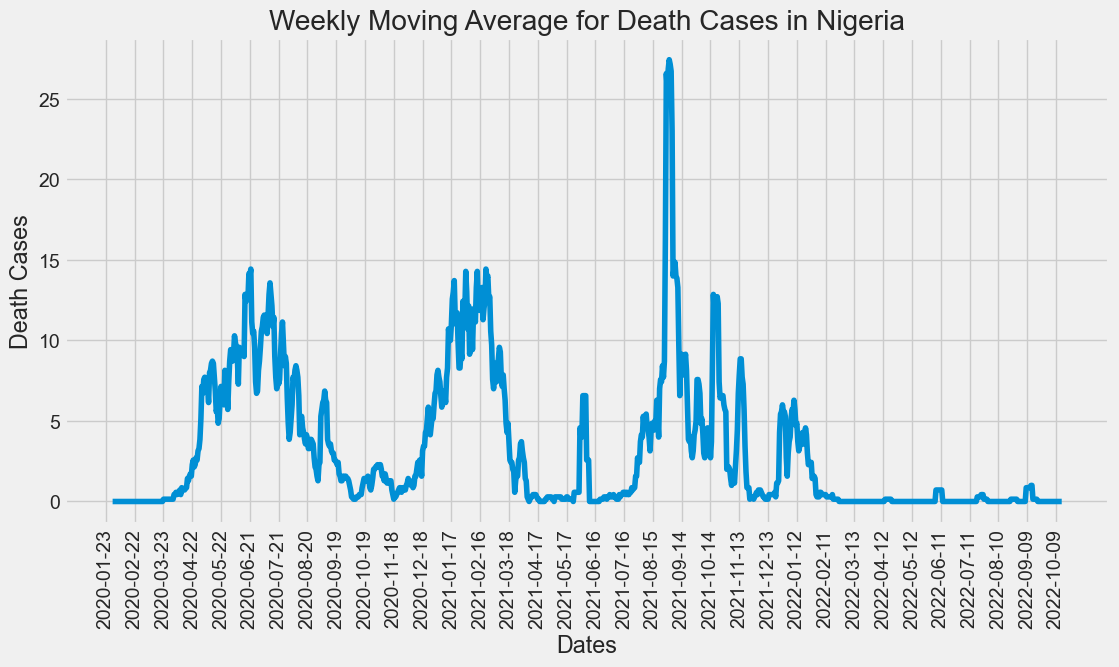

In [86]:
plt.figure(figsize=(12, 6))
plt.title('Weekly Moving Average for Death Cases in Nigeria')
sns.lineplot(x='dates', y='deaths_moving_average', data=nig_timeseries)
plt.xlabel('Dates')
plt.ylabel('Death Cases')
plt.xticks(nig_timeseries.dates[::30], rotation='vertical')
plt.show()

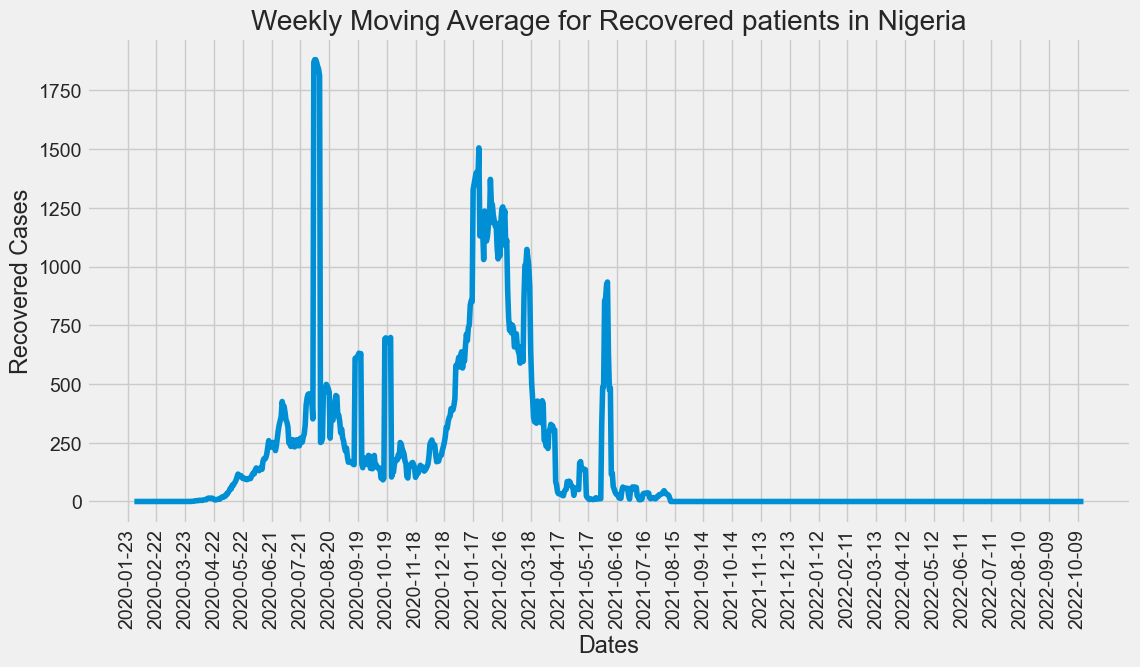

In [87]:
plt.figure(figsize=(12, 6))
plt.title('Weekly Moving Average for Recovered patients in Nigeria')
sns.lineplot(x='dates', y=nig_timeseries['recovered_moving_average'].abs(), data=nig_timeseries)
plt.xlabel('Dates')
plt.ylabel('Recovered Cases')
plt.xticks(nig_timeseries.dates[::30], rotation='vertical')
plt.show()

In [88]:
nig_timeseries.head()

dates  deaths  recovered  confirmed  daily_death_count  \
0 2020-01-23       0          0          0                NaN   
1 2020-01-24       0          0          0                0.0   
2 2020-01-25       0          0          0                0.0   
3 2020-01-26       0          0          0                0.0   
4 2020-01-27       0          0          0                0.0   

   daily_recovered_count  daily_confirmed_count  deaths_moving_average  \
0                    NaN                    NaN                    NaN   
1                    0.0                    0.0                    NaN   
2                    0.0                    0.0                    NaN   
3                    0.0                    0.0                    NaN   
4                    0.0                    0.0                    NaN   

   recovered_moving_average  confirmed_moving_average  
0                       NaN                       NaN  
1                       NaN                       NaN  
2                       NaN                       NaN  
3                       NaN                       NaN  
4                       NaN                       NaN

TODO G - 
* Calculate maximum infection rate for a day (Number of new cases)
* Find the date

In [89]:
nig_timeseries['daily_confirmed_count'].max()

6158.0

In [90]:
nig_timeseries[nig_timeseries['daily_confirmed_count'] == nig_timeseries['daily_confirmed_count'].max()]

dates  deaths  recovered  confirmed  daily_death_count  \
699 2021-12-22    2991          0     231413                6.0   

     daily_recovered_count  daily_confirmed_count  deaths_moving_average  \
699                    0.0                 6158.0               1.142857   

     recovered_moving_average  confirmed_moving_average  
699                       0.0               1627.571429

#### Merge Covid External And Data DataFrames to provide more analysis.

In [91]:
 covid_external.head(2)

states         region  Population  Overall CCVI Index  Age  \
0      FCT  North Central     4865000                 0.3  0.0   
1  Plateau  North Central     4766000                 0.4  0.5   

   Epidemiological  Fragility  Health System  Population Density  \
0              0.9        0.4            0.6                 0.9   
1              0.4        0.8            0.3                 0.3   

   Socio-Economic   Transport Availability  Acute IHR  
0             0.6                      0.2       0.79  
1             0.5                      0.3       0.93

In [92]:
data.head(2)

states  lab_confirmed_cases  cases_on_admission  discharged  deaths
0  Lagos               104014                 871      102372     771
1    FCT                29464                 143       29072     249

In [93]:
dataset=pd.merge(data, covid_external, on=['states'], how='inner')

In [94]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   lab_confirmed_cases      37 non-null     int64  
 2   cases_on_admission       37 non-null     int64  
 3   discharged               37 non-null     int64  
 4   deaths                   37 non-null     int64  
 5   region                   37 non-null     object 
 6   Population               37 non-null     int64  
 7   Overall CCVI Index       37 non-null     float64
 8   Age                      37 non-null     float64
 9   Epidemiological          37 non-null     float64
 10  Fragility                37 non-null     float64
 11  Health System            37 non-null     float64
 12  Population Density       37 non-null     float64
 13  Socio-Economic           37 non-null     float64
 14   Transport Availability  37 

In [95]:
dataset.shape


(37, 16)

In [96]:
dataset.head()

states  lab_confirmed_cases  cases_on_admission  discharged  deaths  \
0   Lagos               104014                 871      102372     771   
1     FCT                29464                 143       29072     249   
2  Rivers                18044                  89       17800     155   
3  Kaduna                11576                  11       11476      89   
4     Oyo                10332                   3       10127     202   

          region  Population  Overall CCVI Index  Age  Epidemiological  \
0     South West    13992000                 0.0  0.1              1.0   
1  North Central     4865000                 0.3  0.0              0.9   
2    South South     7763000                 0.4  0.5              0.9   
3     North West     9227000                 0.7  0.1              0.9   
4     South West     8737000                 0.2  0.7              0.8   

   Fragility  Health System  Population Density  Socio-Economic  \
0        0.3            0.1                 1.0             0.1   
1        0.4            0.6                 0.9             0.6   
2        0.6            0.6                 0.9             0.1   
3        0.8            0.9                 0.4             0.6   
4        0.2            0.8                 0.6             0.2   

    Transport Availability  Acute IHR  
0                      0.4       0.93  
1                      0.2       0.79  
2                      0.1       1.00  
3                      0.4       0.86  
4                      0.3       1.06

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 0 to 36
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   states                   37 non-null     object 
 1   lab_confirmed_cases      37 non-null     int64  
 2   cases_on_admission       37 non-null     int64  
 3   discharged               37 non-null     int64  
 4   deaths                   37 non-null     int64  
 5   region                   37 non-null     object 
 6   Population               37 non-null     int64  
 7   Overall CCVI Index       37 non-null     float64
 8   Age                      37 non-null     float64
 9   Epidemiological          37 non-null     float64
 10  Fragility                37 non-null     float64
 11  Health System            37 non-null     float64
 12  Population Density       37 non-null     float64
 13  Socio-Economic           37 non-null     float64
 14   Transport Availability  37 

In [98]:
#Get top ten states by lab confirmed cases
line=dataset.nlargest(10, 'lab_confirmed_cases')

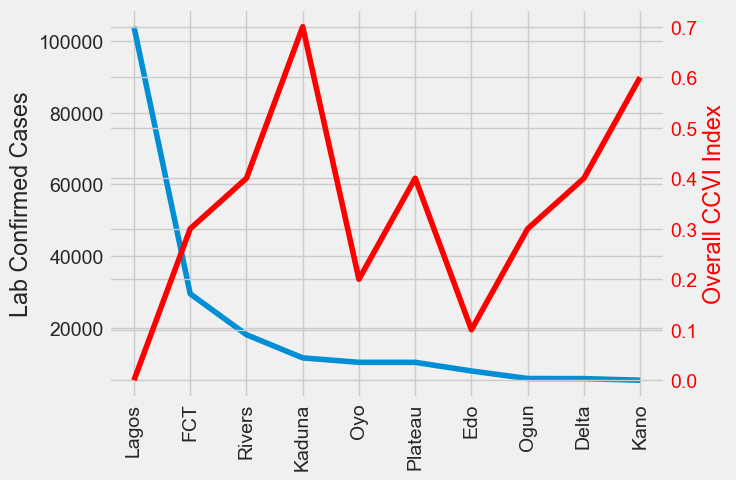

In [99]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.plot('states', 'lab_confirmed_cases', data=line)

ax1.set_ylabel('Lab Confirmed Cases')

ax2 = ax1.twinx()

ax2.plot('states', 'Overall CCVI Index', 'r-',data=line)

ax2.set_ylabel('Overall CCVI Index', color='r')

for tl in ax2.get_yticklabels():
    
    tl.set_color('r')

plt.setp(ax1.xaxis.get_majorticklabels(), rotation=90)

plt.show()

#### Check correlation between variables

In [100]:
dataset.columns

Index(['states', 'lab_confirmed_cases', 'cases_on_admission', 'discharged',
       'deaths', 'region', 'Population', 'Overall CCVI Index', 'Age',
       'Epidemiological', 'Fragility', 'Health System', 'Population Density',
       'Socio-Economic', ' Transport Availability', 'Acute IHR'],
      dtype='object')

In [101]:
correlation=dataset[['lab_confirmed_cases', 'cases_on_admission', 'discharged',
       'deaths', 'Population', 'Overall CCVI Index', 'Age',
       'Epidemiological', 'Fragility', 'Health System', 'Population Density',
       'Socio-Economic', ' Transport Availability', 'Acute IHR']].corr()

<AxesSubplot: >

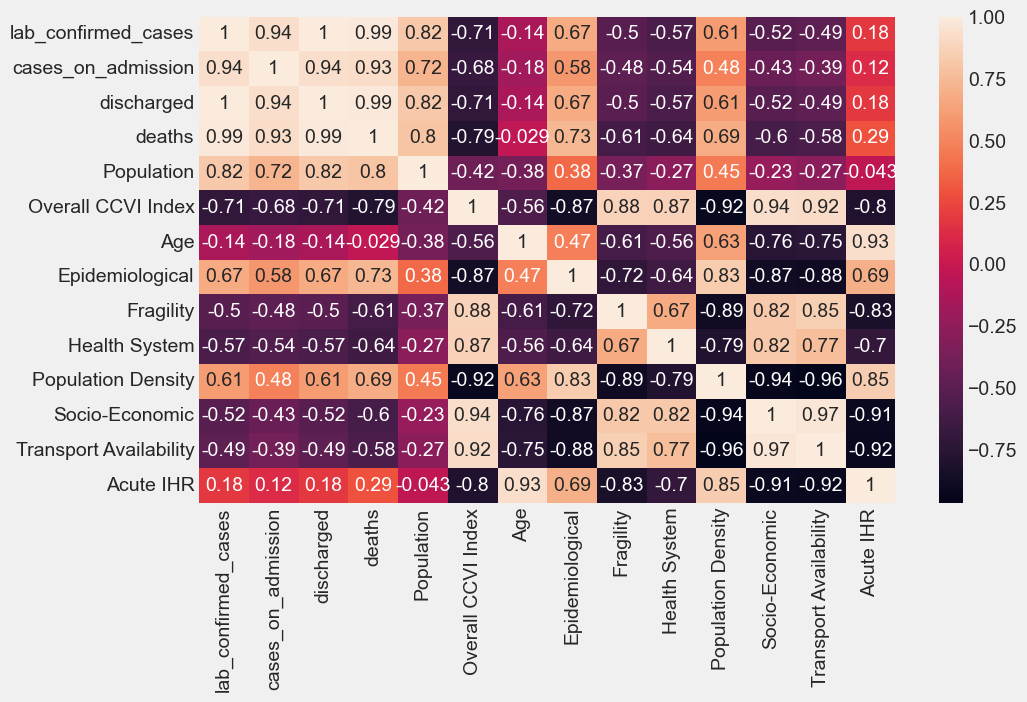

In [102]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation.corr(), annot= True)

### Analysis on the Budget Data.

In [103]:
# Getting the difference between the initial and revised budget. 
budget_data['difference']= budget_data['Initial_budget (Bn)']- budget_data['Revised_budget (Bn)']
budget_data.head()


states  Initial_budget (Bn)  Revised_budget (Bn)  difference
0       Abia               136.60               102.70       33.90
1    Adamawa               183.30               139.31       43.99
2  Akwa-Ibom               597.73               366.00      231.73
3    Anambra               137.10               112.80       24.30
4     Bauchi               167.20               128.00       39.20

In [104]:
#Percentage Variation from original Budget
budget_data['percent'] = ((budget_data['difference'] / budget_data['Initial_budget (Bn)']) * 100).round(2)
budget_data.head()

states  Initial_budget (Bn)  Revised_budget (Bn)  difference  percent
0       Abia               136.60               102.70       33.90    24.82
1    Adamawa               183.30               139.31       43.99    24.00
2  Akwa-Ibom               597.73               366.00      231.73    38.77
3    Anambra               137.10               112.80       24.30    17.72
4     Bauchi               167.20               128.00       39.20    23.44

In [105]:
#State with the Highest variation in Budget.
budget_data['percent'].max()


86.63

In [106]:
budget_data[budget_data['percent'] == budget_data['percent'].max()]

states  Initial_budget (Bn)  Revised_budget (Bn)  difference  percent
8  Cross River               1100.0                147.1       952.9    86.63

In [107]:
#State with the lowest variation in Budget
budget_data['percent'].min()


12.7

In [108]:
budget_data[budget_data['percent'] == budget_data['percent'].min()]

states  Initial_budget (Bn)  Revised_budget (Bn)  difference  percent
19  Katsina                244.0                213.0        31.0     12.7

In [109]:
# Top 10 States with the highest variation in Original budget

In [110]:
top10_highest = budget_data.nlargest(10, 'percent')

In [111]:
top10_highest

states  Initial_budget (Bn)  Revised_budget (Bn)  difference  percent
8   Cross River              1100.00               147.10      952.90    86.63
23        Lagos              1680.00               920.50      759.50    45.21
15          Imo               197.60               108.30       89.30    45.19
31       Rivers               530.80               300.40      230.40    43.41
21         Kogi               176.00               102.00       74.00    42.05
24     Nasarawa               108.40                62.96       45.44    41.92
2     Akwa-Ibom               597.73               366.00      231.73    38.77
26         Ogun               449.90               280.00      169.90    37.76
6         Benue               189.00               119.00       70.00    37.04
25        Niger               155.00                98.00       57.00    36.77

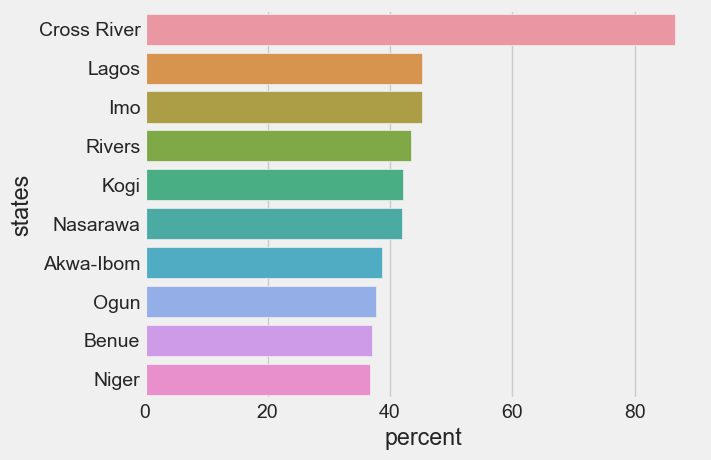

In [112]:
#plt.figure(figsize=(10,6))
sns.barplot(y='states', x='percent',
    data= top10_highest);

In [113]:
# Top 10 States with smallest variation in original budget

In [114]:
top10_low = budget_data.nsmallest(10, 'percent')
top10_low

states  Initial_budget (Bn)  Revised_budget (Bn)  difference  percent
19  Katsina               244.00                213.0       31.00    12.70
13    Enugu               169.56                146.4       23.16    13.66
17   Kaduna               259.25                223.6       35.65    13.75
3   Anambra               137.10                112.8       24.30    17.72
14    Gombe               130.83                107.4       23.43    17.91
29      Oyo               213.00                174.0       39.00    18.31
16   Jigawa               152.92                124.0       28.92    18.91
27     Ondo               187.80                151.4       36.40    19.38
34     Yobe               108.00                 86.0       22.00    20.37
4    Bauchi               167.20                128.0       39.20    23.44

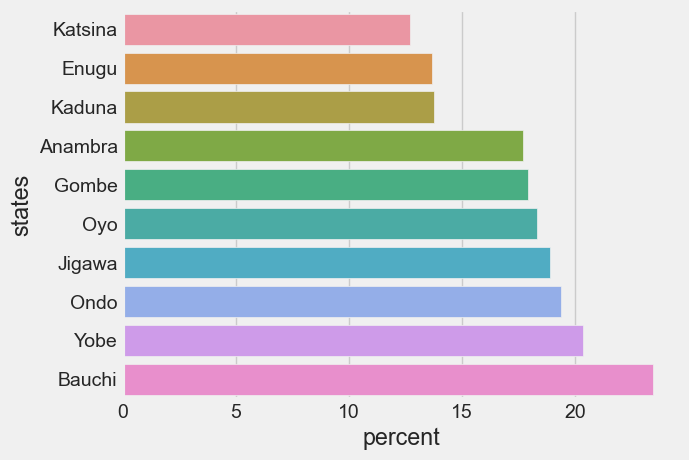

In [115]:
#plt.figure(figsize=(14,6))
sns.barplot(y='states', x='percent',
    data= top10_low);

### Analysis Of Geographical Data

In [116]:
geo_nig = gpd.read_file('./Nig_geojson.json')

In [117]:
#geo_nig

In [118]:
geo_nig.explore()

In [119]:
geo_nig.head()

admin1Name admin1Pcod admin1RefN admin1AltN admin1Al_1 admin0Name  \
0       Abia      NG001       Abia       None       None    Nigeria   
1    Adamawa      NG002    Adamawa       None       None    Nigeria   
2  Akwa Ibom      NG003  Akwa Ibom       None       None    Nigeria   
3    Anambra      NG004    Anambra       None       None    Nigeria   
4     Bauchi      NG005     Bauchi       None       None    Nigeria   

  admin0Pcod        date     validOn validTo  Shape_Leng  Shape_Area  \
0         NG  2016-11-29  2016-12-15    None    4.695135    0.396543   
1         NG  2016-11-29  2016-12-15    None   11.525443    3.113007   
2         NG  2016-11-29  2016-12-15    None    5.263830    0.549476   
3         NG  2016-11-29  2016-12-15    None    3.595960    0.392661   
4         NG  2016-11-29  2016-12-15    None   13.952005    4.011018   

                                            geometry  
0  MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036...  
1  MULTIPOLYGON (((13.62129 10.94823, 13.62592 10...  
2  MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...  
3  MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698...  
4  MULTIPOLYGON (((10.75125 12.46148, 10.75615 12...

In [120]:
geo_nig.shape

(37, 13)

In [121]:
Geo_nig=geo_nig[['admin1Name', 'Shape_Leng','Shape_Area', 'geometry']]

In [122]:
Geo_nig.columns=['states', 'Shape_Length', 'Shape_Area', 'geometry']

In [123]:
Geo_nig.head()

states  Shape_Length  Shape_Area  \
0       Abia      4.695135    0.396543   
1    Adamawa     11.525443    3.113007   
2  Akwa Ibom      5.263830    0.549476   
3    Anambra      3.595960    0.392661   
4     Bauchi     13.952005    4.011018   

                                            geometry  
0  MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036...  
1  MULTIPOLYGON (((13.62129 10.94823, 13.62592 10...  
2  MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...  
3  MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698...  
4  MULTIPOLYGON (((10.75125 12.46148, 10.75615 12...

In [124]:
Geo_nig.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   states        37 non-null     object  
 1   Shape_Length  37 non-null     float64 
 2   Shape_Area    37 non-null     float64 
 3   geometry      37 non-null     geometry
dtypes: float64(2), geometry(1), object(1)
memory usage: 1.3+ KB


In [125]:
#Relace state names so we can join with data table
Geo_nig= Geo_nig.replace(['Federal Capital Territory', 'Nasarawa'], ['FCT', 'Nassarawa'])

In [126]:
Geo_nig

states  Shape_Length  Shape_Area  \
0          Abia      4.695135    0.396543   
1       Adamawa     11.525443    3.113007   
2     Akwa Ibom      5.263830    0.549476   
3       Anambra      3.595960    0.392661   
4        Bauchi     13.952005    4.011018   
5       Bayelsa      5.046708    0.776768   
6         Benue      9.408080    2.578363   
7         Borno     13.714364    5.987849   
8   Cross River      8.779796    1.711218   
9         Delta      7.372526    1.394082   
10       Ebonyi      4.489355    0.518050   
11          Edo      7.889425    1.595809   
12        Ekiti      3.395633    0.471634   
13        Enugu      4.319893    0.624323   
14          FCT      3.498412    0.607222   
15        Gombe      5.955286    1.438747   
16          Imo      2.878088    0.414097   
17       Jigawa     11.771497    1.928873   
18       Kaduna     12.613678    3.645639   
19         Kano      8.244195    1.685607   
20      Katsina      9.105637    1.991947   
21        Kebbi     14.968981    3.035227   
22         Kogi     10.476383    2.368882   
23        Kwara     12.046963    2.766244   
24        Lagos      4.287770    0.300166   
25    Nassarawa      9.537188    2.197927   
26        Niger     18.921559    5.930956   
27         Ogun      9.649774    1.364021   
28         Ondo      7.751109    1.233546   
29         Osun      4.660140    0.704549   
30          Oyo      8.624586    2.264918   
31      Plateau      8.575527    2.180996   
32       Rivers      5.814545    0.830196   
33       Sokoto     10.503159    2.679547   
34       Taraba     13.696255    4.802474   
35         Yobe     11.096937    3.726688   
36      Zamfara      9.466144    2.782855   

                                             geometry  
0   MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036...  
1   MULTIPOLYGON (((13.62129 10.94823, 13.62592 10...  
2   MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...  
3   MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698...  
4   MULTIPOLYGON (((10.75125 12.46148, 10.75615 12...  
5   MULTIPOLYGON (((6.55283 5.37988, 6.56198 5.379...  
6   MULTIPOLYGON (((8.52442 8.15727, 8.54240 8.148...  
7   MULTIPOLYGON (((13.35885 13.71261, 13.36207 13...  
8   MULTIPOLYGON (((8.56068 4.79847, 8.55944 4.798...  
9   MULTIPOLYGON (((6.66892 6.50123, 6.67111 6.484...  
10  MULTIPOLYGON (((8.24431 6.78560, 8.24976 6.775...  
11  MULTIPOLYGON (((6.13357 7.55208, 6.13835 7.550...  
12  MULTIPOLYGON (((5.50593 8.01869, 5.50872 8.017...  
13  MULTIPOLYGON (((7.54536 7.00125, 7.54930 6.991...  
14  MULTIPOLYGON (((7.67239 9.41128, 7.71959 9.346...  
15  MULTIPOLYGON (((11.07149 11.31249, 11.07479 11...  
16  MULTIPOLYGON (((7.26575 5.93081, 7.26607 5.927...  
17  MULTIPOLYGON (((10.23002 13.01060, 10.23084 13...  
18  MULTIPOLYGON (((8.16953 11.48727, 8.16955 11.4...  
19  MULTIPOLYGON (((8.30528 12.58803, 8.31002 12.5...  
20  MULTIPOLYGON (((7.81802 13.33042, 7.82082 13.3...  
21  MULTIPOLYGON (((4.25355 13.26045, 4.26682 13.2...  
22  MULTIPOLYGON (((6.51270 8.39867, 6.52740 8.375...  
23  MULTIPOLYGON (((3.73068 10.06829, 3.73651 10.0...  
24  MULTIPOLYGON (((3.32387 6.67388, 3.32879 6.673...  
25  MULTIPOLYGON (((7.99731 9.31436, 8.00084 9.306...  
26  MULTIPOLYGON (((4.92994 11.35723, 4.93396 11.3...  
27  MULTIPOLYGON (((2.84613 7.92988, 2.85077 7.929...  
28  MULTIPOLYGON (((5.92604 7.73182, 5.92513 7.728...  
29  MULTIPOLYGON (((4.94975 8.05548, 4.95674 8.053...  
30  MULTIPOLYGON (((4.21046 8.97003, 4.25339 8.966...  
31  MULTIPOLYGON (((8.79339 10.38465, 8.79925 10.3...  
32  MULTIPOLYGON (((6.64358 5.70171, 6.64836 5.699...  
33  MULTIPOLYGON (((5.51464 13.89442, 5.52912 13.8...  
34  MULTIPOLYGON (((10.83822 9.61847, 10.84855 9.6...  
35  MULTIPOLYGON (((11.22181 13.37400, 11.25518 13...  
36  MULTIPOLYGON (((6.84870 13.08240, 6.87310 13.0...

In [127]:
data.head()

states  lab_confirmed_cases  cases_on_admission  discharged  deaths
0   Lagos               104014                 871      102372     771
1     FCT                29464                 143       29072     249
2  Rivers                18044                  89       17800     155
3  Kaduna                11576                  11       11476      89
4     Oyo                10332                   3       10127     202

In [128]:
Geo_nig=pd.merge(Geo_nig, data, on=['states'], how='inner') #combining the data table and the geo_nig table

In [129]:
Geo_nig.head()

states  Shape_Length  Shape_Area  \
0       Abia      4.695135    0.396543   
1    Adamawa     11.525443    3.113007   
2  Akwa Ibom      5.263830    0.549476   
3    Anambra      3.595960    0.392661   
4     Bauchi     13.952005    4.011018   

                                            geometry  lab_confirmed_cases  \
0  MULTIPOLYGON (((7.38681 6.03667, 7.38729 6.036...                 2261   
1  MULTIPOLYGON (((13.62129 10.94823, 13.62592 10...                 1312   
2  MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...                 5004   
3  MULTIPOLYGON (((6.93254 6.71090, 6.93167 6.698...                 2825   
4  MULTIPOLYGON (((10.75125 12.46148, 10.75615 12...                 2001   

   cases_on_admission  discharged  deaths  
0                  -1        2228      34  
1                 134        1140      38  
2                   7        4953      44  
3                  46        2760      19  
4                  10        1967      24

### Map to Show Lab Confirmed Cases across all States

In [130]:

Geo_nig.explore(column='lab_confirmed_cases',cmap='plasma',scheme='Percentiles', legend=True, tooltip=['states','lab_confirmed_cases','cases_on_admission','deaths']) 

### Map to show deaths across states

In [141]:

Geo_nig.explore(column='deaths',cmap='plasma', scheme='Percentiles',legend=True, tooltip=['states','lab_confirmed_cases','cases_on_admission','deaths']) 


In [132]:
Geo_nig=pd.merge(Geo_nig,covid_external[['states', 'region', 'Population']] , on=['states'], how='inner')

In [133]:
Geo_nig[Geo_nig['region']=='South South']

states  Shape_Length  Shape_Area  \
5       Bayelsa      5.046708    0.776768   
8   Cross River      8.779796    1.711218   
9         Delta      7.372526    1.394082   
10       Ebonyi      4.489355    0.518050   
11          Edo      7.889425    1.595809   
32       Rivers      5.814545    0.830196   

                                             geometry  lab_confirmed_cases  \
5   MULTIPOLYGON (((6.55283 5.37988, 6.56198 5.379...                 1364   
8   MULTIPOLYGON (((8.56068 4.79847, 8.55944 4.798...                  919   
9   MULTIPOLYGON (((6.66892 6.50123, 6.67111 6.484...                 5784   
10  MULTIPOLYGON (((8.24431 6.78560, 8.24976 6.775...                 2064   
11  MULTIPOLYGON (((6.13357 7.55208, 6.13835 7.550...                 7923   
32  MULTIPOLYGON (((6.64358 5.70171, 6.64836 5.699...                18044   

    cases_on_admission  discharged  deaths       region  Population  
5                    1        1335      28  South South     2606000  
8                    2         892      25  South South     4272000  
9                  502        5170     112  South South     6303000  
10                  28        2004      32  South South     3192000  
11                   0        7601     322  South South     4705000  
32                  89       17800     155  South South     7763000

In [134]:
Geo_nig.at[10, 'region']='South East' #Setting the correct region 

In [135]:
Geo_nig.at[2, 'region']='South South' #Setting the correct region

In [136]:
Geo_nig[Geo_nig['states']=='Ebonyi']['region'] #Checking if the changes has been effected.

10    South East
Name: region, dtype: object

In [137]:
south_south=(Geo_nig[Geo_nig['region']=='South South']).reset_index()

In [138]:
south_south.head()

index       states  Shape_Length  Shape_Area  \
0      2    Akwa Ibom      5.263830    0.549476   
1      5      Bayelsa      5.046708    0.776768   
2      8  Cross River      8.779796    1.711218   
3      9        Delta      7.372526    1.394082   
4     11          Edo      7.889425    1.595809   

                                            geometry  lab_confirmed_cases  \
0  MULTIPOLYGON (((8.34482 4.61140, 8.34496 4.609...                 5004   
1  MULTIPOLYGON (((6.55283 5.37988, 6.56198 5.379...                 1364   
2  MULTIPOLYGON (((8.56068 4.79847, 8.55944 4.798...                  919   
3  MULTIPOLYGON (((6.66892 6.50123, 6.67111 6.484...                 5784   
4  MULTIPOLYGON (((6.13357 7.55208, 6.13835 7.550...                 7923   

   cases_on_admission  discharged  deaths       region  Population  
0                   7        4953      44  South South     6093000  
1                   1        1335      28  South South     2606000  
2                   2         892      25  South South     4272000  
3                 502        5170     112  South South     6303000  
4                   0        7601     322  South South     4705000

In [139]:
south_south.explore(column='deaths',cmap='viridis', scheme='quantiles',legend=True, tooltip=['states','lab_confirmed_cases','cases_on_admission','deaths'])
# for i in range(len(south_south)):
#      plt.text(south_south.Longitude[i],south_south.Latitude[i],"{}\n{}".format(south_south.states[i], south_south.deaths[i]),size=16, color='r')
# plt.title('COVID-19 Deaths by States for the South South.',fontsize=25)
# plt.show()